In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

import warnings 
warnings.filterwarnings('ignore')
import os 
import re
import FinanceDataReader as fdr
import time

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, f1_score, roc_auc_score ,accuracy_score, precision_score, recall_score, confusion_matrix
import joblib 

rfc = RandomForestClassifier()
xgb = XGBClassifier()
cat = CatBoostClassifier()
models = [rfc,xgb,cat]

# 모델 데이터 구성

In [36]:
df_count = pd.read_csv('./data/데이터_뉴스키워드빈도/AJ네트웍스.csv',index_col=0)
df_count.index = pd.DatetimeIndex(df_count.index)
df_count.head()

,렌탈사업,순매도한달누적,영업익,주가등락폭,영업이익,일일회전율,투자주체,상승세,분석,지분변동,...,매매동향,렌탈,외국,단기중기,자회사,회사채,기관,도로와철도운송,상승,상승률
날짜,,,,,,,,,,,,,,,,,,,,,
2016-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-05,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
# 주가코드데이터
df_kospi = fdr.StockListing('KRX')

In [55]:
df_kospi = df_kospi[df_kospi['Market']=='KOSPI']
df_kospi = df_kospi.dropna(subset=['Sector'])
df_kospi.to_csv('./data/recent_kospi_list.csv')

In [56]:
df_kospi = pd.read_csv('./data/recent_kospi_list.csv',index_col=0)
code = df_kospi[df_kospi['Name']=='AJ네트웍스']['Symbol'].iloc[0]
code

95570

In [39]:
# 주가데이터
bgn_date= '2016-01-01'
end_date= '2022-03-31'
df_p = fdr.DataReader(code,bgn_date,end_date)
df_p.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2016-01-04,9560,9730,9420,9600,20135,0.019108
2016-01-05,9450,9550,9360,9540,8225,-0.006250
2016-01-06,9610,9610,9440,9560,7271,0.002096
2016-01-07,9580,9580,9120,9300,5358,-0.027197
2016-01-08,9050,9330,9040,9220,7056,-0.008602


In [3]:
# df_p = df_p.reset_index()
# df_p = df_p.rename(columns = {'Date': '날짜'})
# df_p = df_p.set_index('날짜',drop=True)
# df_p

In [41]:
df_count.head()

,렌탈사업,순매도한달누적,영업익,주가등락폭,영업이익,일일회전율,투자주체,상승세,분석,지분변동,...,매매동향,렌탈,외국,단기중기,자회사,회사채,기관,도로와철도운송,상승,상승률
날짜,,,,,,,,,,,,,,,,,,,,,
2016-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-05,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [44]:
# merge
df_merge = pd.merge(df_count,df_p['Close'],left_index=True,right_index=True, how='right')
df_merge

,렌탈사업,순매도한달누적,영업익,주가등락폭,영업이익,일일회전율,투자주체,상승세,분석,지분변동,...,렌탈,외국,단기중기,자회사,회사채,기관,도로와철도운송,상승,상승률,Close
날짜,,,,,,,,,,,,,,,,,,,,,
2016-01-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9600
2016-01-05,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,9540
2016-01-06,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,9560
2016-01-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9300
2016-01-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6030
2022-03-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6180
2022-03-29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6080


In [46]:
window_size = 7
period_rate = 0.05

earning_lst = []
for i in range(len(df_merge)-window_size):
    earning_rate = (df_merge.iloc[i+window_size,-1]- df_merge.iloc[i,-1])/df_merge.iloc[i,-1]
    
    if earning_rate >= period_rate:
        earning_lst.append(1)
    else:
        earning_lst.append(0)
        
df_model = df_merge.iloc[:-window_size,:]
df_model['target'] = earning_lst

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_14716/3217427320.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['target'] = earning_lst


In [48]:
df_model['target'].value_counts()

0    1256
1     271
Name: target, dtype: int64

# 함수화: 

## corp_code(회사이름)

In [3]:
df_kospi = pd.read_csv('./data/recent_kospi_list.csv',index_col=0)
# 코드 반환
def corp_code(corp_name):
    code = df_kospi[df_kospi['Name']==corp_name]['Symbol'].iloc[0]
    code = str(code).zfill(6)
    return code

code = corp_code('SK')
code

'034730'

## stock_price(code)

In [4]:
# 주가데이터
def stock_price(code,bgn_date= '2016-01-01',end_date= '2022-03-31'):

    df_p = fdr.DataReader(code,bgn_date,end_date)
    df_p = df_p.reset_index()
    df_p = df_p.rename(columns = {'Date': '날짜'})
    df_p = df_p.set_index('날짜',drop=True)
    
    return df_p

In [5]:
df_p = stock_price(code)
index = df_p.index

## mscaler(df)

In [6]:
from sklearn.preprocessing import MinMaxScaler

def mscaler(df):

    df.index = pd.DatetimeIndex(df.index)
    col_list = df.columns
    scaler = MinMaxScaler()
    df_scaled = df.copy()
    df_scaled[col_list] = scaler.fit_transform(df[col_list])
    
    return df_scaled

In [7]:
# df = pd.read_csv('./data/데이터_뉴스키워드빈도/SK.csv',index_col=0)
# df.index = pd.DatetimeIndex(df.index)
# col_list = df.columns
# scaler = MinMaxScaler()
# df_scaled = df.copy()
# df_scaled[col_list] = scaler.fit_transform(df[col_list])


In [ ]:
code = corp_code('SK')
df_p = stock_price(code)
df_merge = merge(df_count,df_p)

## merge(df_count,df_scaled)

In [8]:
# merge
def merge(df_count, df_scaled):
    df_merge = pd.merge(df_count,df_p_scaled['Close_scaled'],left_index=True,right_index=True, how='right')
    df_merge = pd.merge(df_merge,df_p['Close'],left_index=True,right_index=True, how='right')
    return df_merge

## add_target(df_merge,window_size, period_rate)

In [9]:
def add_target(df_merge,window_size, period_rate):

    earning_lst = []
    for i in range(len(df_merge)-window_size):
        
        earning_rate = (df_merge.iloc[i+window_size,-1]- df_merge.iloc[i,-1])/df_merge.iloc[i,-1]

        if earning_rate >= period_rate:
            earning_lst.append(1)
        else:
            earning_lst.append(0)

    df_model = df_merge.iloc[:-window_size,:]
    df_model['target'] = earning_lst
    
    return df_model

In [10]:
# df_model = add_target(df_merge, window_size=7, period_rate=0.05)
# df_model.head()

## get_clf_eval(y_test,pred,proba)

In [11]:
def get_clf_eval(y_test, pred, proba):
#     confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    try:
        roc_auc = roc_auc_score(y_test, proba)
    except:
        roc_auc = 0

    print('accuracy:{0:.4f}, precision:{1:.4f}, recall:{2:.4f}, roc_auc:{3:.4f}'.format(accuracy,precision,recall,roc_auc))

## feature20()

In [12]:
def feature20(model):

    # 배열형태로 반환
    ft_importance_values = model.feature_importances_

    # 정렬과 시각화를 쉽게 하기 위해 series 전환
    ft_series = pd.Series(ft_importance_values, index = x_train.columns)
    ft_top20 = ft_series.sort_values(ascending=False)[:20]

    # 시각화
    plt.figure(figsize=(8,6))
    plt.title('Feature Importance Top 20')
    sns.barplot(x=ft_top20, y=ft_top20.index)
    plt.show()

In [13]:
## test_model_data(corp_name,model_name)

In [14]:
# def test_model_data(corp_name,model_name,window_size,period_rate):

#     code = corp_code(corp_name)
#     df_p = stock_price(code)
#     df_p_scaled = mscaler(df_p)

#     path = './data/데이터_뉴스키워드빈도/'
#     file_path = os.path.join(path,corp_name+'.csv')
#     df_count = pd.read_csv(file_path,index_col=0)
#     df_count.index = pd.DatetimeIndex(df_count.index)

#     df_merge = merge(df_count,df_p_scaled)

#     df_model = add_target(df_merge,window_size=window_size, period_rate= period_rate)

#     x_train = df_model.loc[:'2021-10-01',:'Close_scaled']
#     y_train = df_model.loc[:'2021-10-01','target']

#     x_test = df_model.loc['2021-10-01':,:'Close_scaled']
#     y_test = df_model.loc['2021-10-01':,'target']

#     # featurn importance
#     model = joblib.load(model_name)
#     pred = model.predict(x_test)
    
#     print(classification_report(y_test,pred))
#     feature20(model)

In [15]:
# window_size = 30
# period_rate = 0.1
# model_name = './data/machine_model_30일_10/대우조선해양_CatBoostClassifier.pkl'

# code = corp_code('대우조선해양')
# df_p = stock_price(code)
# df_p_scaled = mscaler(df_p)

# path = './data/데이터_뉴스키워드빈도/'
# file_path = os.path.join(path,corp_name+'.csv')
# df_count = pd.read_csv(file_path,index_col=0)
# df_count.index = pd.DatetimeIndex(df_count.index)

# df_merge = merge(df_count,df_p_scaled)

# df_model = add_target(df_merge,window_size=window_size, period_rate= period_rate)

# x_train = df_model.loc[:'2021-10-01', :'Close_scaled']
# y_train = df_model.loc[:'2021-10-01','target']

# x_test = df_model.loc['2021-10-01':, :'Close_scaled']
# y_test = df_model.loc['2021-10-01':,'target']

# print(x_train.shape)
# print(x_test.shape)

# print(y_train.shape)
# print(y_test.shape)

# x_test

# # # featurn importance
# model = joblib.load(model_name)
# pred = model.predict(x_test)

# print(classification_report(y_test,pred))
# feature20(model)


In [76]:
x_test.isnull().sum().sum()

0

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2021-10-01 to 2022-02-15
Columns: 308 entries, 배당 to Close_scaled
dtypes: float64(1), int64(307)
memory usage: 222.1 KB


# (연습)모델돌리기

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, f1_score, roc_auc_score

In [219]:
rfc = RandomForestClassifier()
xgb = XGBClassifier()
cat = CatBoostClassifier()
models = [rfc,xgb,cat]

In [220]:
x_train = df_model.loc[:'2021-10-01',:'Close_scaled']
y_train = df_model.loc[:'2021-10-01','target']

x_test = df_model.loc['2021-10-01':,:'Close_scaled']
y_test = df_model.loc['2021-10-01':,'target']

In [216]:
# x_train = df_model.loc[:'2021-10-01',:'Close_scaled']
# y_train = df_model.loc[:'2021-10-01','target']

# x_test = df_model.loc['2021-10-01':,:'Close_scaled']
# y_test = df_model.loc['2021-10-01':,'target']

In [221]:
print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(1413, 1213)
(115, 1213)
(1413,)
(115,)


In [214]:
for model in models :
    print(model.__class__.__name__)
    model.fit(x_train,y_train)
    
    #train점수
    train_score = model.score(x_train,y_train)
    #test점수
    test_score = model.score(x_test,y_test)
    
    # 예측
    preds = model.predict(x_test)
    proba = model.predict_proba(x_test)[:,1]
    
    print('train_score :',train_score) 
    print('test_score :',test_score)
    print('roc_auc_score :', roc_auc_score(y_test, proba))
    print(classification_report(y_test,preds))
    print('-'*50)

KNeighborsClassifier
train_score : 0.861995753715499
test_score : 0.9217391304347826
roc_auc_score : 0.58994708994709
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       108
           1       0.00      0.00      0.00         7

    accuracy                           0.92       115
   macro avg       0.47      0.49      0.48       115
weighted avg       0.88      0.92      0.90       115

--------------------------------------------------
RandomForestClassifier
train_score : 0.9907997169143666
test_score : 0.9304347826086956
roc_auc_score : 0.4219576719576719
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       108
           1       0.00      0.00      0.00         7

    accuracy                           0.93       115
   macro avg       0.47      0.50      0.48       115
weighted avg       0.88      0.93      0.91       115

--------------------------------------------------
XGB

C:\Users\bitcamp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


train_score : 0.9525831564048125
test_score : 0.8869565217391304
roc_auc_score : 0.6124338624338624
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       108
           1       0.00      0.00      0.00         7

    accuracy                           0.89       115
   macro avg       0.47      0.47      0.47       115
weighted avg       0.88      0.89      0.88       115

--------------------------------------------------
CatBoostClassifier
Learning rate set to 0.011941
0:	learn: 0.6857436	total: 4.95ms	remaining: 4.95s
1:	learn: 0.6784114	total: 8.97ms	remaining: 4.47s
2:	learn: 0.6711712	total: 12.8ms	remaining: 4.25s
3:	learn: 0.6641637	total: 16.8ms	remaining: 4.17s
4:	learn: 0.6574884	total: 21.2ms	remaining: 4.22s
5:	learn: 0.6508954	total: 25.3ms	remaining: 4.2s
6:	learn: 0.6445521	total: 29.2ms	remaining: 4.13s
7:	learn: 0.6382428	total: 33.1ms	remaining: 4.1s
8:	learn: 0.6322173	total: 37.6ms	remaining: 4.14s
9:	learn: 0.6262

179:	learn: 0.3801086	total: 698ms	remaining: 3.18s
180:	learn: 0.3797724	total: 702ms	remaining: 3.18s
181:	learn: 0.3794780	total: 707ms	remaining: 3.17s
182:	learn: 0.3792418	total: 711ms	remaining: 3.17s
183:	learn: 0.3789676	total: 715ms	remaining: 3.17s
184:	learn: 0.3788197	total: 719ms	remaining: 3.17s
185:	learn: 0.3786955	total: 722ms	remaining: 3.16s
186:	learn: 0.3784904	total: 726ms	remaining: 3.16s
187:	learn: 0.3782586	total: 730ms	remaining: 3.15s
188:	learn: 0.3779492	total: 734ms	remaining: 3.15s
189:	learn: 0.3777082	total: 738ms	remaining: 3.15s
190:	learn: 0.3774211	total: 742ms	remaining: 3.14s
191:	learn: 0.3771255	total: 745ms	remaining: 3.14s
192:	learn: 0.3769298	total: 749ms	remaining: 3.13s
193:	learn: 0.3765216	total: 753ms	remaining: 3.13s
194:	learn: 0.3763391	total: 757ms	remaining: 3.12s
195:	learn: 0.3761635	total: 760ms	remaining: 3.12s
196:	learn: 0.3760170	total: 765ms	remaining: 3.12s
197:	learn: 0.3757757	total: 768ms	remaining: 3.11s
198:	learn: 

380:	learn: 0.3450091	total: 1.46s	remaining: 2.38s
381:	learn: 0.3449508	total: 1.47s	remaining: 2.37s
382:	learn: 0.3447893	total: 1.47s	remaining: 2.37s
383:	learn: 0.3447023	total: 1.48s	remaining: 2.37s
384:	learn: 0.3446243	total: 1.48s	remaining: 2.37s
385:	learn: 0.3445040	total: 1.49s	remaining: 2.36s
386:	learn: 0.3444304	total: 1.49s	remaining: 2.36s
387:	learn: 0.3443575	total: 1.49s	remaining: 2.36s
388:	learn: 0.3440869	total: 1.5s	remaining: 2.35s
389:	learn: 0.3440207	total: 1.5s	remaining: 2.35s
390:	learn: 0.3439529	total: 1.51s	remaining: 2.35s
391:	learn: 0.3438947	total: 1.51s	remaining: 2.35s
392:	learn: 0.3438511	total: 1.52s	remaining: 2.34s
393:	learn: 0.3437577	total: 1.52s	remaining: 2.34s
394:	learn: 0.3435773	total: 1.52s	remaining: 2.33s
395:	learn: 0.3434883	total: 1.53s	remaining: 2.33s
396:	learn: 0.3432647	total: 1.53s	remaining: 2.33s
397:	learn: 0.3431524	total: 1.54s	remaining: 2.32s
398:	learn: 0.3430011	total: 1.54s	remaining: 2.32s
399:	learn: 0.

544:	learn: 0.3274437	total: 2.22s	remaining: 1.86s
545:	learn: 0.3273596	total: 2.23s	remaining: 1.85s
546:	learn: 0.3272800	total: 2.23s	remaining: 1.85s
547:	learn: 0.3272338	total: 2.24s	remaining: 1.85s
548:	learn: 0.3271389	total: 2.25s	remaining: 1.84s
549:	learn: 0.3268348	total: 2.25s	remaining: 1.84s
550:	learn: 0.3266121	total: 2.25s	remaining: 1.84s
551:	learn: 0.3264670	total: 2.26s	remaining: 1.83s
552:	learn: 0.3263984	total: 2.26s	remaining: 1.83s
553:	learn: 0.3263283	total: 2.26s	remaining: 1.82s
554:	learn: 0.3262188	total: 2.27s	remaining: 1.82s
555:	learn: 0.3261503	total: 2.27s	remaining: 1.81s
556:	learn: 0.3261042	total: 2.27s	remaining: 1.81s
557:	learn: 0.3259945	total: 2.28s	remaining: 1.8s
558:	learn: 0.3258508	total: 2.28s	remaining: 1.8s
559:	learn: 0.3258099	total: 2.29s	remaining: 1.79s
560:	learn: 0.3256779	total: 2.29s	remaining: 1.79s
561:	learn: 0.3256441	total: 2.29s	remaining: 1.79s
562:	learn: 0.3253865	total: 2.29s	remaining: 1.78s
563:	learn: 0.

737:	learn: 0.3052423	total: 2.99s	remaining: 1.06s
738:	learn: 0.3049773	total: 2.99s	remaining: 1.06s
739:	learn: 0.3047064	total: 3s	remaining: 1.05s
740:	learn: 0.3046671	total: 3s	remaining: 1.05s
741:	learn: 0.3044587	total: 3s	remaining: 1.04s
742:	learn: 0.3044094	total: 3.01s	remaining: 1.04s
743:	learn: 0.3043600	total: 3.01s	remaining: 1.04s
744:	learn: 0.3040132	total: 3.02s	remaining: 1.03s
745:	learn: 0.3039691	total: 3.02s	remaining: 1.03s
746:	learn: 0.3037658	total: 3.02s	remaining: 1.02s
747:	learn: 0.3036420	total: 3.03s	remaining: 1.02s
748:	learn: 0.3036001	total: 3.03s	remaining: 1.01s
749:	learn: 0.3035547	total: 3.03s	remaining: 1.01s
750:	learn: 0.3035075	total: 3.04s	remaining: 1.01s
751:	learn: 0.3033494	total: 3.04s	remaining: 1s
752:	learn: 0.3032793	total: 3.04s	remaining: 999ms
753:	learn: 0.3030475	total: 3.05s	remaining: 995ms
754:	learn: 0.3029157	total: 3.05s	remaining: 991ms
755:	learn: 0.3028716	total: 3.06s	remaining: 987ms
756:	learn: 0.3028335	to

925:	learn: 0.2796142	total: 3.74s	remaining: 299ms
926:	learn: 0.2794088	total: 3.75s	remaining: 295ms
927:	learn: 0.2793503	total: 3.75s	remaining: 291ms
928:	learn: 0.2792222	total: 3.75s	remaining: 287ms
929:	learn: 0.2790804	total: 3.76s	remaining: 283ms
930:	learn: 0.2790013	total: 3.76s	remaining: 279ms
931:	learn: 0.2788568	total: 3.77s	remaining: 275ms
932:	learn: 0.2787336	total: 3.77s	remaining: 271ms
933:	learn: 0.2786292	total: 3.77s	remaining: 267ms
934:	learn: 0.2785992	total: 3.78s	remaining: 263ms
935:	learn: 0.2785471	total: 3.78s	remaining: 258ms
936:	learn: 0.2783731	total: 3.78s	remaining: 254ms
937:	learn: 0.2781897	total: 3.79s	remaining: 250ms
938:	learn: 0.2781188	total: 3.79s	remaining: 246ms
939:	learn: 0.2779390	total: 3.79s	remaining: 242ms
940:	learn: 0.2779090	total: 3.8s	remaining: 238ms
941:	learn: 0.2776463	total: 3.8s	remaining: 234ms
942:	learn: 0.2774331	total: 3.8s	remaining: 230ms
943:	learn: 0.2773989	total: 3.81s	remaining: 226ms
944:	learn: 0.2

C:\Users\bitcamp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:01:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


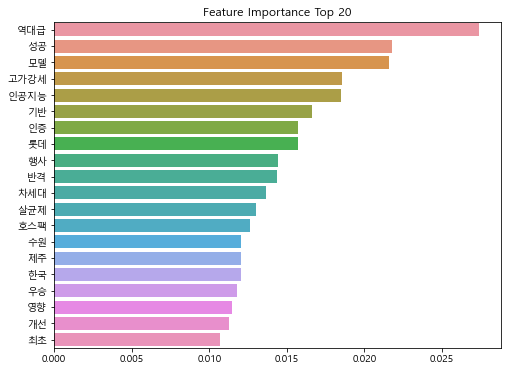

In [217]:
# xgb feature importance 상위 20개
from xgboost import plot_importance

xgb.fit(x_train, y_train)

# 배열형태로 반환
ft_importance_values = xgb.feature_importances_

# 정렬과 시각화를 쉽게 하기 위해 series 전환
ft_series = pd.Series(ft_importance_values, index = x_train.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

# 시각화
plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 20')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()

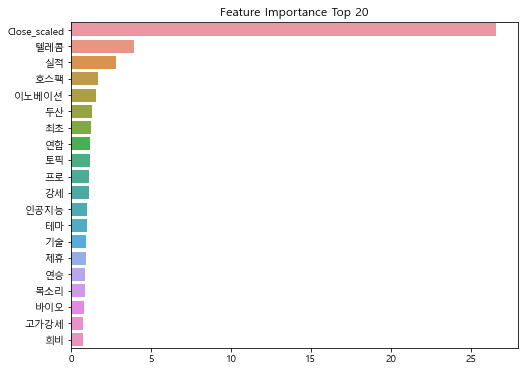

In [218]:
# cat feature importance 상위 20개

# 배열형태로 반환
ft_importance_values = cat.feature_importances_
ft_importance_values

# # 정렬과 시각화를 쉽게 하기 위해 series 전환
ft_series = pd.Series(ft_importance_values, index = x_train.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

# # 시각화
plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 20')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()

# 모든파일 만들기 7일 5% 

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, f1_score, roc_auc_score ,accuracy_score, precision_score, recall_score, confusion_matrix
import joblib 

rfc = RandomForestClassifier()
xgb = XGBClassifier()
cat = CatBoostClassifier()
models = [rfc,xgb,cat]

In [23]:
window_size = 7
period_rate= 0.05

path = './data/데이터_뉴스키워드빈도/'
file_list = os.listdir(path)

corp_list =[]
model_list = []
accu_list = []
precision_list = []
recall_list = []
roc_list = []
model_path = []

for file in file_list[:10] :
    corp_name = file[:-4]
    print('회사이름: ',corp_name)
    code = corp_code(corp_name)
    df_p = stock_price(code)
    df_p_scaled = mscaler(df_p)
    df_p_scaled.rename(columns = {'Close':'Close_scaled'},inplace=True)
    
    file_path = os.path.join(path,file)
    df_count = pd.read_csv(file_path,index_col=0)
    df_count.index = pd.DatetimeIndex(df_count.index)
    
    # 5개 미만 단어 아예없는경우는 생략
    try:
        df_count = mscaler(df_count)

        df_merge = merge(df_count,df_p_scaled)

        df_model = add_target(df_merge,window_size=window_size, period_rate= period_rate)

        x_train = df_model.loc[:'2021-10-01',:'Close_scaled']
        y_train = df_model.loc[:'2021-10-01','target']

        x_test = df_model.loc['2021-10-01':,:'Close_scaled']
        y_test = df_model.loc['2021-10-01':,'target']


        for model in models :
            time.sleep(0.3)
            model_name = model.__class__.__name__

            if model_name == 'CatBoostClassifier':
                model.fit(x_train,y_train, silent=True)
            else:
                model.fit(x_train,y_train)

            pred = model.predict(x_test)
            accuracy = accuracy_score(y_test, pred)
            proba = model.predict_proba(x_test)[:,1]
            precision = precision_score(y_test, pred)
            recall = recall_score(y_test, pred)

            try:
                roc_auc = roc_auc_score(y_test, proba)
            except:
                roc_auc = 0

            save_path = f'./data/machine_model_{window_size}일_{period_rate}/{corp_name}_{model_name}.pkl'
            joblib.dump(model, save_path)

            if (precision > 0.6) & (recall > 0.4) & (precision!=1):

                corp_list.append(corp_name)
                model_list.append(model_name)
                accu_list.append(accuracy)
                precision_list.append(precision)
                recall_list.append(recall)
                roc_list.append(roc_auc)
                model_path.append(save_path)

                print('회사이름: ',corp_name)
                print('모델이름: ',model_name)
                get_clf_eval(y_test,pred, proba)
                print(save_path)
                print('-'*50)
    
    except:
        print('출현 단어 5개 미만 종목')
    
    print('='* 50)
    
df_result = pd.DataFrame({'회사이름':corp_list, '모델이름':model_list,'accuracy':accu_list,
                          'precision':precision_list,'recall':recall_list,'roc_auc':roc_list,'모델주소':model_path})

df_result.to_csv(f'./data/model_result/machine_model_{window_size}일_{period_rate}.csv')


회사이름:  AJ네트웍스
[19:14:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  AK홀딩스
[19:14:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  BGF
[19:14:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  BYC
[19:14:40] WARNING: C

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

회사이름:  CS홀딩스
[19:15:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  DB
[19:15:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [22]:
df_result

,회사이름,모델이름,accuracy,precision,recall,roc_auc,모델주소
0,한진칼,RandomForestClassifier,0.817391,0.666667,0.444444,0.524341,./data/machine_model_7일_0.05/한화솔루션_CatBoostCla...
1,한진칼,XGBClassifier,0.834783,0.722222,0.481481,0.524341,./data/machine_model_7일_0.05/한화솔루션_CatBoostCla...


              precision    recall  f1-score   support

           0       0.84      0.95      0.89        75
           1       0.43      0.18      0.25        17

    accuracy                           0.80        92
   macro avg       0.63      0.56      0.57        92
weighted avg       0.76      0.80      0.77        92



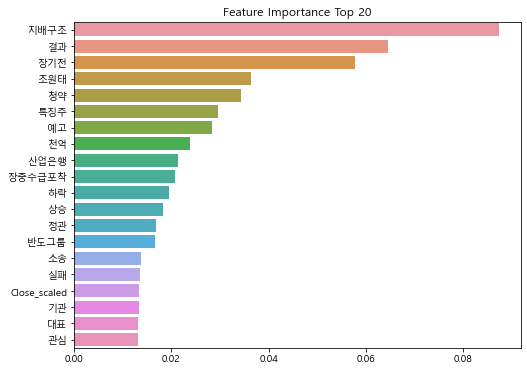

In [33]:
# 모델 검증하기
# 한진칼,  
corp_name = '한진칼'
code = corp_code(corp_name)
df_p = stock_price(code)
df_p_scaled = mscaler(df_p)

path = './data/데이터_뉴스키워드빈도/'
file_path = os.path.join(path,corp_name+'.csv')
df_count = pd.read_csv(file_path,index_col=0)
df_count.index = pd.DatetimeIndex(df_count.index)

df_merge = merge(df_count,df_p_scaled)

df_model = add_target(df_merge,window_size=window_size, period_rate= period_rate)

x_train = df_model.loc[:'2021-10-01',:'Close_scaled']
y_train = df_model.loc[:'2021-10-01','target']

x_test = df_model.loc['2021-10-01':,:'Close_scaled']
y_test = df_model.loc['2021-10-01':,'target']


# featurn importance
model_name = './data/machine_model_7일_5/한진칼_XGBClassifier.pkl'
model = joblib.load(model_name)
pred = model.predict(x_test)

print(classification_report(y_test,pred))
feature20(model)

In [58]:
# 키워드가 미치는 영향
df_count['지배구조'][df_count['지배구조']!=0]

날짜
2018-11-14    1
2018-11-15    1
2018-11-16    2
2019-01-03    1
2019-03-27    1
2019-04-08    1
2019-04-28    1
2020-02-03    1
2020-02-07    4
2020-02-14    1
2020-02-24    1
2020-03-13    2
2020-03-18    1
2020-03-20    1
2020-03-24    1
2020-03-26    1
2020-03-27    1
2020-04-02    1
2020-04-17    1
2020-07-13    1
2020-11-16    1
2021-07-15    1
2021-10-12    1
2021-11-11    1
2022-02-15    2
2022-03-28    2
Name: 지배구조, dtype: int64

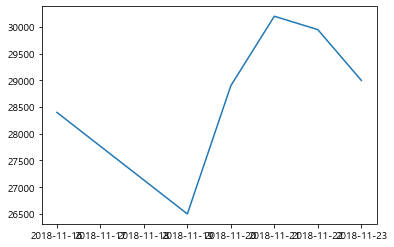

In [61]:
plt.plot(df_p.loc['2018-11-16':'2018-11-23']['Close'])

# 모든파일 만들기 7일 10%

In [13]:
window_size = 7
period_rate= 0.1

path = './data/데이터_뉴스키워드빈도/'
file_list = os.listdir(path)

corp_list =[]
model_list = []
accu_list = []
precision_list = []
recall_list = []
roc_list = []
model_path = []

for file in file_list[:] :
    corp_name = file[:-4]
    print('회사이름: ',corp_name)
    code = corp_code(corp_name)
    df_p = stock_price(code)
    df_p_scaled = mscaler(df_p)
    df_p_scaled.rename(columns = {'Close':'Close_scaled'},inplace=True)
    
    file_path = os.path.join(path,file)
    df_count = pd.read_csv(file_path,index_col=0)
    df_count.index = pd.DatetimeIndex(df_count.index)
    
    # 5개 미만 단어 아예없는경우는 생략
    try:
        df_count = mscaler(df_count)

        df_merge = merge(df_count,df_p_scaled)

        df_model = add_target(df_merge,window_size=window_size, period_rate= period_rate)

        x_train = df_model.loc[:'2021-10-01',:'Close_scaled']
        y_train = df_model.loc[:'2021-10-01','target']

        x_test = df_model.loc['2021-10-01':,:'Close_scaled']
        y_test = df_model.loc['2021-10-01':,'target']


        for model in models :
            time.sleep(0.3)
            model_name = model.__class__.__name__

            if model_name == 'CatBoostClassifier':
                model.fit(x_train,y_train, silent=True)
            else:
                model.fit(x_train,y_train)

            pred = model.predict(x_test)
            accuracy = accuracy_score(y_test, pred)
            proba = model.predict_proba(x_test)[:,1]
            precision = precision_score(y_test, pred)
            recall = recall_score(y_test, pred)

            try:
                roc_auc = roc_auc_score(y_test, proba)
            except:
                roc_auc = 0

            save_path = f'./data/machine_model_{window_size}일_{period_rate}/{corp_name}_{model_name}.pkl'
            joblib.dump(model, save_path)

            if (precision > 0.6) & (recall > 0.4) & (precision!=1):

                corp_list.append(corp_name)
                model_list.append(model_name)
                accu_list.append(accuracy)
                precision_list.append(precision)
                recall_list.append(recall)
                roc_list.append(roc_auc)
                model_path.append(save_path)

                print('회사이름: ',corp_name)
                print('모델이름: ',model_name)
                get_clf_eval(y_test,pred, proba)
                print(save_path)
                print('-'*50)

    except:
        print('출현 단어 5개 미만 종목')
    
    print('='* 50)
    
df_result = pd.DataFrame({'회사이름':corp_list, '모델이름':model_list,'accuracy':accu_list,
                          'precision':precision_list,'recall':recall_list,'roc_auc':roc_list,'모델주소':model_path})

df_result.to_csv(f'./data/model_result/machine_model_{window_size}일_{period_rate}.csv')

    

회사이름:  AJ네트웍스
[22:44:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  AK홀딩스
[22:44:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  BGF
[22:44:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  BYC
[22:44:38] WARNING: C

[22:45:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  HJ중공업
[22:46:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  HMM
[22:46:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  HSD엔진
[22:46:08] WARNING: C:/Users/Admi

회사이름:  LG
[22:47:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  LG디스플레이
[22:47:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  LG생활건강
[22:47:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  LG유플러스
[22:47:36] WARNIN

회사이름:  SG세계물산
[22:48:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  SIMPAC
[22:48:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  SJM
[22:48:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  SJM홀딩스
[22:48:51] WARNIN

회사이름:  TKG휴켐스
출현 단어 5개 미만 종목
회사이름:  TYM
[22:50:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  WISCOM
[22:50:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  YG PLUS
[22:50:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회

회사이름:  극동유화
[22:51:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  금강공업
[22:51:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  금양
[22:51:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  금호건설
[22:51:17] WARNING: C:/U

회사이름:  다우기술
[22:52:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  다이나믹디자인
[22:52:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  대교
[22:52:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  대동
[22:52:36] WARNING: C:/

회사이름:  대한유화
[22:53:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  대한전선
[22:53:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  대한제강
[22:53:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  대한제당
[22:53:47] WARNING: C:

회사이름:  동양고속
[22:54:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  동양철관
[22:55:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  동원F&B
[22:55:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  동원산업
[22:55:05] WARNING: C

회사이름:  만도
[22:56:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  메타랩스
[22:56:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  명문제약
[22:56:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  모나미
[22:56:20] WARNING: C:/Us

회사이름:  사조대림
[22:57:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  사조동아원
[22:57:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  사조산업
[22:57:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  삼부토건
[22:57:27] WARNING: C

회사이름:  삼호개발
[22:58:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  삼화전기
[22:58:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  삼화전자
[22:58:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  삼화콘덴서
[22:58:37] WARNING: C

회사이름:  세아특수강
[22:59:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  세아홀딩스
[22:59:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  세우글로벌
[22:59:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  세원이앤씨
[22:59:43] WARNING

회사이름:  신풍제지
[23:00:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  신흥
[23:00:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  쌍방울
[23:00:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  쌍용C&E
[23:00:56] WARNING: C:/U

회사이름:  에스원
[23:02:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  에이블씨엔씨
[23:02:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  에이엔피
[23:02:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  에이프로젠 MED
[23:02:08] WARNI

회사이름:  웅진씽크빅
[23:03:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  원림
[23:03:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  웰바이오텍
[23:03:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  유니드
[23:03:18] WARNING: C:/

회사이름:  인터지스
[23:04:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  인팩
[23:04:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  일동홀딩스
[23:04:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  일성건설
[23:04:25] WARNING: C:/

회사이름:  종근당홀딩스
[23:05:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  주연테크
[23:05:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  지엠비코리아
[23:05:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  지투알
[23:05:30] WARNING:

회사이름:  쿠쿠홀딩스
[23:06:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  크라운해태홀딩스
[23:06:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  태경비케이
[23:06:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  태경산업
[23:06:45] WARNI

회사이름:  포스코케미칼
[23:07:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  풀무원
[23:07:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  풍산홀딩스
[23:07:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  플레이그램
출현 단어 5개 미만 종목
회사이름

회사이름:  한라홀딩스
[23:08:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한미글로벌
[23:08:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한미반도체
[23:08:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한미사이언스
[23:09:01] WARNIN

회사이름:  한전KPS
[23:10:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한전산업
[23:10:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한진
[23:10:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한진중공업홀딩스
[23:10:14] WARNING:

회사이름:  현대차
[23:11:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  현대코퍼레이션
[23:11:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  현대코퍼레이션홀딩스
[23:11:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  현대퓨처넷
[23:11:37] WA

In [14]:
df_result

,회사이름,모델이름,accuracy,precision,recall,roc_auc,모델주소
0,화신,XGBClassifier,0.956522,0.8,0.5,0.799065,./data/machine_model_7일_0.1/화신_XGBClassifier.pkl


# 모든파일 만들기 7일 15%

In [16]:
window_size = 7
period_rate= 0.15

path = './data/데이터_뉴스키워드빈도/'
file_list = os.listdir(path)

corp_list =[]
model_list = []
accu_list = []
precision_list = []
recall_list = []
roc_list = []
model_path = []

for file in file_list[:] :
    corp_name = file[:-4]
    print('회사이름: ',corp_name)
    code = corp_code(corp_name)
    df_p = stock_price(code)
    df_p_scaled = mscaler(df_p)
    df_p_scaled.rename(columns = {'Close':'Close_scaled'},inplace=True)
    
    file_path = os.path.join(path,file)
    df_count = pd.read_csv(file_path,index_col=0)
    df_count.index = pd.DatetimeIndex(df_count.index)
    
    # 5개 미만 단어 아예없는경우는 생략
    try:
        df_count = mscaler(df_count)

        df_merge = merge(df_count,df_p_scaled)

        df_model = add_target(df_merge,window_size=window_size, period_rate= period_rate)

        x_train = df_model.loc[:'2021-10-01',:'Close_scaled']
        y_train = df_model.loc[:'2021-10-01','target']

        x_test = df_model.loc['2021-10-01':,:'Close_scaled']
        y_test = df_model.loc['2021-10-01':,'target']


        for model in models :
            time.sleep(0.3)
            model_name = model.__class__.__name__

            if model_name == 'CatBoostClassifier':
                model.fit(x_train,y_train, silent=True)
            else:
                model.fit(x_train,y_train)

            pred = model.predict(x_test)
            accuracy = accuracy_score(y_test, pred)
            proba = model.predict_proba(x_test)[:,1]
            precision = precision_score(y_test, pred)
            recall = recall_score(y_test, pred)

            try:
                roc_auc = roc_auc_score(y_test, proba)
            except:
                roc_auc = 0

            save_path = f'./data/machine_model_{window_size}일_{period_rate}/{corp_name}_{model_name}.pkl'
            joblib.dump(model, save_path)

            if (precision > 0.6) & (recall > 0.4) & (precision!=1):

                corp_list.append(corp_name)
                model_list.append(model_name)
                accu_list.append(accuracy)
                precision_list.append(precision)
                recall_list.append(recall)
                roc_list.append(roc_auc)
                model_path.append(save_path)

                print('회사이름: ',corp_name)
                print('모델이름: ',model_name)
                get_clf_eval(y_test,pred, proba)
                print(save_path)
                print('-'*50)

    except:
        print('출현 단어 5개 미만 종목')
    
    print('='* 50)
    
df_result = pd.DataFrame({'회사이름':corp_list, '모델이름':model_list,'accuracy':accu_list,
                          'precision':precision_list,'recall':recall_list,'roc_auc':roc_list,'모델주소':model_path})

df_result.to_csv(f'./data/model_result/machine_model_{window_size}일_{period_rate}.csv')

    

회사이름:  AJ네트웍스
[23:31:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  AK홀딩스
[23:31:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  BGF
[23:31:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  BYC
[23:31:31] WARNING: C

[23:32:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  HJ중공업
[23:32:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  HMM
[23:32:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  HSD엔진
[23:32:57] WARNING: C:/Users/Admi

회사이름:  LG디스플레이
[23:34:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  LG생활건강
[23:34:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  LG유플러스
[23:34:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  LG이노텍
[23:34:24] WAR

회사이름:  SIMPAC
[23:35:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  SJM
[23:35:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  SJM홀딩스
[23:35:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  SK
[23:35:40] WARNING: C

회사이름:  YG PLUS
[23:36:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  가온전선
[23:36:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  강남제비스코
[23:36:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  강원랜드
[23:36:52] WARNIN

회사이름:  금양
[23:37:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  금호건설
[23:37:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  금호석유
[23:37:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  금호에이치티
[23:37:58] WARNING: C:

회사이름:  대교
[23:39:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  대동
[23:39:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  대림B&Co
[23:39:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  대림통상
[23:39:14] WARNING: C:/U

회사이름:  대한제강
[23:40:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  대한제당
[23:40:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  대한제분
[23:40:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  대한항공
[23:40:22] WARNING: C:

회사이름:  동원F&B
[23:41:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  동원산업
[23:41:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  동원수산
[23:41:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  동원시스템즈
[23:41:33] WARNING:

회사이름:  명문제약
[23:42:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  모나미
[23:42:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  모토닉
[23:42:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  무림P&P
[23:42:49] WARNING: C:/

회사이름:  사조산업
[23:43:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  삼부토건
[23:43:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  삼성SDI
[23:43:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  삼성공조
[23:43:56] WARNING: C

회사이름:  삼화전자
[23:44:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  삼화콘덴서
[23:44:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  삼화페인트
[23:45:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  상신브레이크
[23:45:05] WARNING

회사이름:  세우글로벌
[23:46:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  세원이앤씨
[23:46:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  세이브존I&C
출현 단어 5개 미만 종목
회사이름:  세종공업
[23:46:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사

회사이름:  쌍방울
[23:47:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  쌍용C&E
[23:47:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  쌍용차
[23:47:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  써니전자
[23:47:26] WARNING: C:/

회사이름:  에이프로젠 MED
[23:48:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  에이프로젠제약
[23:48:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  엔씨소프트
[23:48:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  엔케이
[23:48:37] WAR

회사이름:  유니드
[23:49:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  유니온
[23:49:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  유니온머티리얼
[23:49:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  유니켐
[23:49:47] WARNING: C:

회사이름:  일성건설
[23:50:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  일신방직
[23:50:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  일양약품
[23:50:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  일정실업
[23:50:54] WARNING: C:

회사이름:  지투알
[23:51:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  진도
[23:51:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  진양산업
[23:51:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  진양홀딩스
[23:52:00] WARNING: C:/U

회사이름:  태경산업
[23:53:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  태경케미컬
[23:53:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  태광산업
[23:53:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  태림포장
[23:53:13] WARNING: C

회사이름:  플레이그램
출현 단어 5개 미만 종목
회사이름:  하나투어
[23:54:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  하이스틸
[23:54:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  하이트진로
[23:54:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:

회사이름:  한미사이언스
[23:55:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한미약품
[23:55:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한섬
[23:55:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한세실업
[23:55:29] WARNING: C:

회사이름:  한진중공업홀딩스
[23:56:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한진칼
[23:56:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한화
[23:56:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한화솔루션
[23:56:48] WARNING: 

회사이름:  현대퓨처넷
[23:57:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  현대홈쇼핑
[23:57:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  혜인
[23:57:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  호텔신라
[23:58:01] WARNING: C:

In [17]:
df_result

,회사이름,모델이름,accuracy,precision,recall,roc_auc,모델주소


# 모든파일 만들기 30일 5%

In [14]:
window_size = 30
period_rate= 0.05

path = './data/데이터_뉴스키워드빈도/'
file_list = os.listdir(path)

corp_list =[]
model_list = []
accu_list = []
precision_list = []
recall_list = []
roc_list = []
model_path = []

for file in file_list[:] :
    corp_name = file[:-4]
    print('회사이름: ',corp_name)
    code = corp_code(corp_name)
    df_p = stock_price(code)
    df_p_scaled = mscaler(df_p)
    df_p_scaled.rename(columns = {'Close':'Close_scaled'},inplace=True)
    
    file_path = os.path.join(path,file)
    df_count = pd.read_csv(file_path,index_col=0)
    df_count.index = pd.DatetimeIndex(df_count.index)
    
    # 5개 미만 단어 아예없는경우는 생략
    try:
        df_count = mscaler(df_count)

        df_merge = merge(df_count,df_p_scaled)

        df_model = add_target(df_merge,window_size=window_size, period_rate= period_rate)

        x_train = df_model.loc[:'2021-10-01',:'Close_scaled']
        y_train = df_model.loc[:'2021-10-01','target']

        x_test = df_model.loc['2021-10-01':,:'Close_scaled']
        y_test = df_model.loc['2021-10-01':,'target']


        for model in models :
            time.sleep(0.3)
            model_name = model.__class__.__name__

            if model_name == 'CatBoostClassifier':
                model.fit(x_train,y_train, silent=True)
            else:
                model.fit(x_train,y_train)

            pred = model.predict(x_test)
            accuracy = accuracy_score(y_test, pred)
            proba = model.predict_proba(x_test)[:,1]
            precision = precision_score(y_test, pred)
            recall = recall_score(y_test, pred)

            try:
                roc_auc = roc_auc_score(y_test, proba)
            except:
                roc_auc = 0

            save_path = f'./data/machine_model_{window_size}일_{period_rate}/{corp_name}_{model_name}.pkl'
            joblib.dump(model, save_path)

            if (precision > 0.6) & (recall > 0.4) & (precision!=1):

                corp_list.append(corp_name)
                model_list.append(model_name)
                accu_list.append(accuracy)
                precision_list.append(precision)
                recall_list.append(recall)
                roc_list.append(roc_auc)
                model_path.append(save_path)

                print('회사이름: ',corp_name)
                print('모델이름: ',model_name)
                get_clf_eval(y_test,pred, proba)
                print(save_path)
                print('-'*50)

    except:
        print('출현 단어 5개 미만 종목')
    
    print('='* 50)
    
df_result = pd.DataFrame({'회사이름':corp_list, '모델이름':model_list,'accuracy':accu_list,
                          'precision':precision_list,'recall':recall_list,'roc_auc':roc_list,'모델주소':model_path})

df_result.to_csv(f'./data/model_result/machine_model_{window_size}일_{period_rate}.csv')

    

회사이름:  AJ네트웍스
[10:59:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  AK홀딩스
[10:59:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  BGF
[11:00:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  BYC
[11:00:05] WARNING: C

[11:01:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  HJ중공업
[11:01:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  HMM
[11:01:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  HSD엔진
[11:01:34] WARNING: C:/Users/Admi

회사이름:  LG
[11:02:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  LG디스플레이
[11:02:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  LG생활건강
[11:02:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  LG유플러스
[11:03:02] WARNIN

[11:04:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  SG세계물산
[11:04:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  SIMPAC
[11:04:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  SJM
[11:04:14] WARNING: C:/Users/Ad

회사이름:  TCC스틸
회사이름:  TCC스틸
모델이름:  RandomForestClassifier
accuracy:0.6739, precision:0.6585, recall:0.6279, roc_auc:0.7311
./data/machine_model_30일_0.05/TCC스틸_RandomForestClassifier.pkl
--------------------------------------------------
[11:05:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  TCC스틸
모델이름:  XGBClassifier
accuracy:0.7065, precision:0.7500, recall:0.5581, roc_auc:0.7250
./data/machine_model_30일_0.05/TCC스틸_XGBClassifier.pkl
--------------------------------------------------
회사이름:  TCC스틸
모델이름:  CatBoostClassifier
accuracy:0.6848, precision:0.6400, recall:0.7442, roc_auc:0.7430
./data/machine_model_30일_0.05/TCC스틸_CatBoostClassifier.pkl
--------------------------------------------------
회사이름:  TKG휴켐스
출현 단어 5개 미만 종목
회사이름:  T

회사이름:  광전자
[11:06:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  국도화학
[11:06:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  국동
[11:06:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  국제약품
[11:06:27] WARNING: C:/Us

회사이름:  녹십자
[11:07:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  녹십자홀딩스
[11:07:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  농심
[11:07:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  농심홀딩스
[11:07:39] WARNING: C:

회사이름:  대원전선
[11:08:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  대원전선
모델이름:  XGBClassifier
accuracy:0.7065, precision:0.6207, recall:0.5294, roc_auc:0.7599
./data/machine_model_30일_0.05/대원전선_XGBClassifier.pkl
--------------------------------------------------
회사이름:  대원제약
[11:08:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  대원화성
[11:08:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default e

회사이름:  동방
[11:09:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  동방아그로
[11:09:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  동부건설
[11:09:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  동서
[11:09:48] WARNING: C:/Us

회사이름:  디아이씨
[11:10:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  디아이씨
모델이름:  XGBClassifier
accuracy:0.7935, precision:0.6275, recall:1.0000, roc_auc:0.9549
./data/machine_model_30일_0.05/디아이씨_XGBClassifier.pkl
--------------------------------------------------
회사이름:  디아이씨
모델이름:  CatBoostClassifier
accuracy:0.7935, precision:0.6275, recall:1.0000, roc_auc:0.9372
./data/machine_model_30일_0.05/디아이씨_CatBoostClassifier.pkl
--------------------------------------------------
회사이름:  디와이
[11:10:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly se

[11:11:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  미래아이앤지
[11:11:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  미원상사
[11:11:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  바다로19호
[11:11:52] WARNING: C:/Users/A

[11:12:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  삼성전기
회사이름:  삼성전기
모델이름:  RandomForestClassifier
accuracy:0.7391, precision:0.7188, recall:0.6053, roc_auc:0.7176
./data/machine_model_30일_0.05/삼성전기_RandomForestClassifier.pkl
--------------------------------------------------
[11:12:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  삼성전기
모델이름:  CatBoostClassifier
accuracy:0.6848, precision:0.6364, recall:0.5526, roc_auc:0.8051
./data/machine_model_30일_0.05/삼성전기_CatBoostCl

회사이름:  상신브레이크
[11:13:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  새론오토모티브
[11:13:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  샘표
[11:13:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  서연
[11:14:02] WARNING: C

회사이름:  세진중공업
회사이름:  세진중공업
모델이름:  RandomForestClassifier
accuracy:0.6848, precision:0.6061, recall:0.5556, roc_auc:0.7304
./data/machine_model_30일_0.05/세진중공업_RandomForestClassifier.pkl
--------------------------------------------------
[11:14:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  세진중공업
모델이름:  XGBClassifier
accuracy:0.6957, precision:0.6250, recall:0.5556, roc_auc:0.7820
./data/machine_model_30일_0.05/세진중공업_XGBClassifier.pkl
--------------------------------------------------
회사이름:  세진중공업
모델이름:  CatBoostClassifier
accuracy:0.8696, precision:0.9286, recall:0.7222, roc_auc:0.9184
./data/machine_model_30일_0.05/세진중공업_CatBoostClassifier.pkl
--------------------------------------------------
회사이름:  센트럴인사이트
[11:15:01] WARNING: C:

회사이름:  쌍방울
[11:16:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  쌍용C&E
[11:16:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  쌍용차
[11:16:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  써니전자
[11:16:21] WARNING: C:/

[11:17:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  에스원
[11:17:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  에이블씨엔씨
[11:17:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  에이엔피
[11:17:22] WARNING: C:/Users/Admi

회사이름:  웅진
[11:18:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  웅진씽크빅
[11:18:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  원림
[11:18:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  웰바이오텍
[11:18:31] WARNING: C:/U

회사이름:  인지컨트롤스
[11:19:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  인터지스
[11:19:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  인팩
[11:19:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  일동홀딩스
[11:19:38] WARNING: C

회사이름:  종근당
[11:20:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  종근당홀딩스
[11:20:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  주연테크
[11:20:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  지엠비코리아
[11:20:44] WARNING:

회사이름:  콘텐트리중앙
출현 단어 5개 미만 종목
회사이름:  콤텍시스템
[11:21:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  쿠쿠홀딩스
[11:21:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  크라운해태홀딩스
[11:21:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

회사이름:  평화홀딩스
[11:22:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  포스코스틸리온
[11:22:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  포스코인터내셔널
[11:22:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  포스코케미칼
[11:23:00] W

[11:23:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한국항공우주
[11:23:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한국항공우주
모델이름:  XGBClassifier
accuracy:0.5326, precision:0.6857, recall:0.4286, roc_auc:0.6463
./data/machine_model_30일_0.05/한국항공우주_XGBClassifier.pkl
--------------------------------------------------
회사이름:  한국화장품
[11:24:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evalua

회사이름:  한온시스템
[11:25:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한올바이오파마
[11:25:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한익스프레스
[11:25:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한일철강
[11:25:10] WARNI

회사이름:  현대미포조선
회사이름:  현대미포조선
모델이름:  RandomForestClassifier
accuracy:0.6196, precision:0.6552, recall:0.4318, roc_auc:0.6508
./data/machine_model_30일_0.05/현대미포조선_RandomForestClassifier.pkl
--------------------------------------------------
[11:26:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  현대미포조선
모델이름:  XGBClassifier
accuracy:0.6630, precision:0.6327, recall:0.7045, roc_auc:0.7282
./data/machine_model_30일_0.05/현대미포조선_XGBClassifier.pkl
--------------------------------------------------
회사이름:  현대미포조선
모델이름:  CatBoostClassifier
accuracy:0.6522, precision:0.6875, recall:0.5000, roc_auc:0.6984
./data/machine_model_30일_0.05/현대미포조선_CatBoostClassifier.pkl
--------------------------------------------------
회사이름:  현대백화점
[11:26:20] WARNIN

[11:27:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  후성
[11:27:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  휠라홀딩스
[11:27:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  휴스틸
[11:27:31] WARNING: C:/Users/Adminis

In [15]:
df_result # 잘못들어감

,회사이름,모델이름,accuracy,precision,recall,roc_auc,모델주소
0,LX하우시스,CatBoostClassifier,0.869565,0.909091,0.476190,0.875922,./data/machine_model_30일_0.05/LX하우시스_CatBoostC...
1,TCC스틸,RandomForestClassifier,0.673913,0.658537,0.627907,0.731134,./data/machine_model_30일_0.05/TCC스틸_RandomFore...
2,TCC스틸,XGBClassifier,0.706522,0.750000,0.558140,0.724964,./data/machine_model_30일_0.05/TCC스틸_XGBClassif...
3,TCC스틸,CatBoostClassifier,0.684783,0.640000,0.744186,0.743000,./data/machine_model_30일_0.05/TCC스틸_CatBoostCl...
4,경인전자,RandomForestClassifier,0.695652,0.852941,0.557692,0.794952,./data/machine_model_30일_0.05/경인전자_RandomFores...
5,경인전자,XGBClassifier,0.630435,0.846154,0.423077,0.801202,./data/machine_model_30일_0.05/경인전자_XGBClassifi...
6,금호건설,RandomForestClassifier,0.771739,0.612903,0.678571,0.818638,./data/machine_model_30일_0.05/금호건설_RandomFores...
7,금호건설,CatBoostClassifier,0.826087,0.676471,0.821429,0.860491,./data/machine_model_30일_0.05/금호건설_CatBoostCla...
8,대성홀딩스,RandomForestClassifier,0.663043,0.663043,1.000000,0.553675,./data/machine_model_30일_0.05/대성홀딩스_RandomFore...
9,대성홀딩스,XGBClassifier,0.663043,0.663043,1.000000,0.567425,./data/machine_model_30일_0.05/대성홀딩스_XGBClassif...


# 모든파일 만들기 30일 10%

In [16]:
window_size = 30
period_rate= 0.1

path = './data/데이터_뉴스키워드빈도/'
file_list = os.listdir(path)

corp_list =[]
model_list = []
accu_list = []
precision_list = []
recall_list = []
roc_list = []
model_path = []

for file in file_list[:] :
    corp_name = file[:-4]
    print('회사이름: ',corp_name)
    code = corp_code(corp_name)
    df_p = stock_price(code)
    df_p_scaled = mscaler(df_p)
    df_p_scaled.rename(columns = {'Close':'Close_scaled'},inplace=True)
    
    file_path = os.path.join(path,file)
    df_count = pd.read_csv(file_path,index_col=0)
    df_count.index = pd.DatetimeIndex(df_count.index)
    
    # 5개 미만 단어 아예없는경우는 생략
    try:
        df_count = mscaler(df_count)

        df_merge = merge(df_count,df_p_scaled)

        df_model = add_target(df_merge,window_size=window_size, period_rate= period_rate)

        x_train = df_model.loc[:'2021-10-01',:'Close_scaled']
        y_train = df_model.loc[:'2021-10-01','target']

        x_test = df_model.loc['2021-10-01':,:'Close_scaled']
        y_test = df_model.loc['2021-10-01':,'target']


        for model in models :
            time.sleep(0.3)
            model_name = model.__class__.__name__

            if model_name == 'CatBoostClassifier':
                model.fit(x_train,y_train, silent=True)
            else:
                model.fit(x_train,y_train)

            pred = model.predict(x_test)
            accuracy = accuracy_score(y_test, pred)
            proba = model.predict_proba(x_test)[:,1]
            precision = precision_score(y_test, pred)
            recall = recall_score(y_test, pred)

            try:
                roc_auc = roc_auc_score(y_test, proba)
            except:
                roc_auc = 0

            save_path = f'./data/machine_model_{window_size}일_{period_rate}/{corp_name}_{model_name}.pkl'
            joblib.dump(model, save_path)

            if (precision > 0.6) & (recall > 0.4) & (precision!=1):

                corp_list.append(corp_name)
                model_list.append(model_name)
                accu_list.append(accuracy)
                precision_list.append(precision)
                recall_list.append(recall)
                roc_list.append(roc_auc)
                model_path.append(save_path)

                print('회사이름: ',corp_name)
                print('모델이름: ',model_name)
                get_clf_eval(y_test,pred, proba)
                print(save_path)
                print('-'*50)

    except:
        print('출현 단어 5개 미만 종목')
    
    print('='* 50)
    
df_result = pd.DataFrame({'회사이름':corp_list, '모델이름':model_list,'accuracy':accu_list,
                          'precision':precision_list,'recall':recall_list,'roc_auc':roc_list,'모델주소':model_path})

df_result.to_csv(f'./data/model_result/machine_model_{window_size}일_{period_rate}.csv')

    

회사이름:  AJ네트웍스
[00:29:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  AK홀딩스
[00:29:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  BGF
[00:29:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  BYC
[00:29:41] WARNING: C

[00:31:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  HJ중공업
[00:31:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  HMM
[00:31:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  HSD엔진
[00:31:12] WARNING: C:/Users/Admi

회사이름:  LG
[00:32:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  LG디스플레이
[00:32:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  LG생활건강
[00:32:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  LG유플러스
[00:32:42] WARNIN

회사이름:  SG세계물산
[00:33:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  SIMPAC
[00:33:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  SJM
[00:33:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  SJM홀딩스
[00:33:57] WARNIN

[00:35:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  TCC스틸
모델이름:  XGBClassifier
accuracy:0.7826, precision:0.7778, recall:0.6000, roc_auc:0.7449
./data/machine_model_30일_0.1/TCC스틸_XGBClassifier.pkl
--------------------------------------------------
회사이름:  TCC스틸
모델이름:  CatBoostClassifier
accuracy:0.8370, precision:0.9545, recall:0.6000, roc_auc:0.8474
./data/machine_model_30일_0.1/TCC스틸_CatBoostClassifier.pkl
--------------------------------------------------
회사이름:  TKG휴켐스
출현 단어 5개 미만 종목
회사이름:  TYM
[00:35:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logl

회사이름:  국동
[00:36:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  국제약품
[00:36:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  극동유화
[00:36:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  금강공업
[00:36:18] WARNING: C:/U

회사이름:  농심홀딩스
[00:37:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  다스코
[00:37:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  다우기술
[00:37:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  다이나믹디자인
[00:37:33] WARNING:

회사이름:  대창
[00:38:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  대창단조
[00:38:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  대한방직
[00:38:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  대한유화
[00:38:44] WARNING: C:/U

회사이름:  동아에스티
[00:39:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  동아지질
[00:39:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  동양
[00:39:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  동양고속
[00:39:59] WARNING: C:/

회사이름:  롯데정밀화학
[00:40:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  롯데칠성
[00:41:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  롯데케미칼
[00:41:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  마니커
[00:41:08] WARNING: 

회사이름:  부산산업
[00:42:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  비비안
[00:42:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  비상교육
[00:42:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  비케이탑스
[00:42:20] WARNING: C:

회사이름:  삼영화학
[00:43:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  삼익악기
[00:43:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  삼일제약
[00:43:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  삼천리
[00:43:32] WARNING: C:/

회사이름:  성창기업지주
[00:44:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  세방
[00:44:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  세방전지
[00:44:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  세아베스틸지주
출현 단어 5개 미만 종목
회사이름

회사이름:  신세계푸드
[00:45:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  신송홀딩스
[00:45:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  신영와코루
[00:45:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  신원
[00:45:51] WARNING: C

회사이름:  아이에스동서
[00:46:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  알루코
[00:46:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  알루코
모델이름:  XGBClassifier
accuracy:0.7609, precision:0.7368, recall:0.4516, roc_auc:0.6423
./data/machine_model_30일_0.1/알루코_XGBClassifier.pkl
--------------------------------------------------
회사이름:  애경케미칼
[00:47:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default ev

회사이름:  와이투솔루션
출현 단어 5개 미만 종목
회사이름:  우성
[00:48:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  우신시스템
[00:48:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  우진
[00:48:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  우

회사이름:  이엔플러스
[00:49:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  이연제약
[00:49:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  인디에프
[00:49:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  인스코비
[00:49:26] WARNING: C

회사이름:  제일파마홀딩스
[00:50:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  제주항공
[00:50:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  조광페인트
[00:50:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  조선내화
[00:50:32] WARNING

회사이름:  코오롱
[00:51:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  코오롱인더
[00:51:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  코오롱플라스틱
[00:51:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  코웨이
[00:51:47] WARNING: 

회사이름:  페이퍼코리아
[00:52:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  평화산업
[00:52:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  평화홀딩스
[00:52:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  포스코스틸리온
[00:52:55] WARNI

회사이름:  한국타이어앤테크놀로지
[00:53:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한국프랜지
[00:54:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한국항공우주
[00:54:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한국화장품
[00:54:06] 

회사이름:  한신공영
[00:55:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한신기계
[00:55:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한온시스템
[00:55:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한올바이오파마
[00:55:11] WARNING

회사이름:  현대리바트
[00:56:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  현대모비스
[00:56:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  현대미포조선
[00:56:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  현대백화점
[00:56:28] WARNIN

회사이름:  후성
[00:57:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  휠라홀딩스
[00:57:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  휴스틸
[00:57:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  흥아해운
회사이름:  흥아해운
모델이름:  Rando

In [17]:
df_result

,회사이름,모델이름,accuracy,precision,recall,roc_auc,모델주소
0,TCC스틸,RandomForestClassifier,0.728261,0.647059,0.628571,0.754637,./data/machine_model_30일_0.1/TCC스틸_RandomFores...
1,TCC스틸,XGBClassifier,0.782609,0.777778,0.600000,0.744862,./data/machine_model_30일_0.1/TCC스틸_XGBClassifi...
2,TCC스틸,CatBoostClassifier,0.836957,0.954545,0.600000,0.847368,./data/machine_model_30일_0.1/TCC스틸_CatBoostCla...
3,대우조선해양,XGBClassifier,0.836957,0.687500,0.523810,0.748156,./data/machine_model_30일_0.1/대우조선해양_XGBClassif...
4,대우조선해양,CatBoostClassifier,0.815217,0.642857,0.428571,0.814554,./data/machine_model_30일_0.1/대우조선해양_CatBoostCl...
5,대웅,CatBoostClassifier,0.880435,0.705882,0.666667,0.925676,./data/machine_model_30일_0.1/대웅_CatBoostClassi...
6,디아이씨,XGBClassifier,0.869565,0.725000,0.966667,0.940591,./data/machine_model_30일_0.1/디아이씨_XGBClassifie...
7,디아이씨,CatBoostClassifier,0.880435,0.731707,1.000000,0.967473,./data/machine_model_30일_0.1/디아이씨_CatBoostClas...
8,세진중공업,RandomForestClassifier,0.815217,0.733333,0.458333,0.793811,./data/machine_model_30일_0.1/세진중공업_RandomFores...
9,세진중공업,XGBClassifier,0.815217,0.769231,0.416667,0.805760,./data/machine_model_30일_0.1/세진중공업_XGBClassifi...


# 모든파일 만들기 30일 15%

In [13]:
window_size = 30
period_rate= 0.15

path = './data/데이터_뉴스키워드빈도/'
file_list = os.listdir(path)

corp_list =[]
model_list = []
accu_list = []
precision_list = []
recall_list = []
roc_list = []
model_path = []

for file in file_list[:] :
    corp_name = file[:-4]
    print('회사이름: ',corp_name)
    code = corp_code(corp_name)
    df_p = stock_price(code)
    df_p_scaled = mscaler(df_p)
    df_p_scaled.rename(columns = {'Close':'Close_scaled'},inplace=True)
    
    file_path = os.path.join(path,file)
    df_count = pd.read_csv(file_path,index_col=0)
    df_count.index = pd.DatetimeIndex(df_count.index)
    
    # 5개 미만 단어 아예없는경우는 생략
    try:
        df_count = mscaler(df_count)

        df_merge = merge(df_count,df_p_scaled)

        df_model = add_target(df_merge,window_size=window_size, period_rate= period_rate)

        x_train = df_model.loc[:'2021-10-01',:'Close_scaled']
        y_train = df_model.loc[:'2021-10-01','target']

        x_test = df_model.loc['2021-10-01':,:'Close_scaled']
        y_test = df_model.loc['2021-10-01':,'target']


        for model in models :
            time.sleep(0.3)
            model_name = model.__class__.__name__

            if model_name == 'CatBoostClassifier':
                model.fit(x_train,y_train, silent=True)
            else:
                model.fit(x_train,y_train)

            pred = model.predict(x_test)
            accuracy = accuracy_score(y_test, pred)
            proba = model.predict_proba(x_test)[:,1]
            precision = precision_score(y_test, pred)
            recall = recall_score(y_test, pred)

            try:
                roc_auc = roc_auc_score(y_test, proba)
            except:
                roc_auc = 0

            save_path = f'./data/machine_model_{window_size}일_{period_rate}/{corp_name}_{model_name}.pkl'
            joblib.dump(model, save_path)

            if (precision > 0.6) & (recall > 0.4) & (precision!=1):

                corp_list.append(corp_name)
                model_list.append(model_name)
                accu_list.append(accuracy)
                precision_list.append(precision)
                recall_list.append(recall)
                roc_list.append(roc_auc)
                model_path.append(save_path)

                print('회사이름: ',corp_name)
                print('모델이름: ',model_name)
                get_clf_eval(y_test,pred, proba)
                print(save_path)
                print('-'*50)

    except:
        print('출현 단어 5개 미만 종목')
    
    print('='* 50)
    
df_result = pd.DataFrame({'회사이름':corp_list, '모델이름':model_list,'accuracy':accu_list,
                          'precision':precision_list,'recall':recall_list,'roc_auc':roc_list,'모델주소':model_path})

df_result.to_csv(f'./data/model_result/machine_model_{window_size}일_{period_rate}.csv')


회사이름:  AJ네트웍스
[01:05:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  AK홀딩스
[01:05:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  BGF
[01:05:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  BYC
[01:05:09] WARNING: C

[01:06:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  HJ중공업
[01:06:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  HMM
[01:06:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  HSD엔진
[01:06:37] WARNING: C:/Users/Admi

회사이름:  LG
[01:07:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  LG디스플레이
[01:07:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  LG생활건강
[01:08:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  LG유플러스
[01:08:07] WARNIN

회사이름:  SG세계물산
[01:09:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  SIMPAC
[01:09:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  SJM
[01:09:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  SJM홀딩스
[01:09:23] WARNIN

회사이름:  TKG휴켐스
출현 단어 5개 미만 종목
회사이름:  TYM
[01:10:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  WISCOM
[01:10:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  YG PLUS
[01:10:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회

회사이름:  극동유화
[01:11:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  금강공업
[01:11:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  금양
[01:11:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  금호건설
[01:11:47] WARNING: C:/U

회사이름:  다우기술
[01:12:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  다이나믹디자인
[01:12:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  대교
[01:12:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  대동
[01:13:03] WARNING: C:/

[01:13:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  대창단조
[01:13:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  대한방직
[01:13:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  대한유화
[01:14:02] WARNING: C:/Users/Admin

[01:15:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  동아지질
[01:15:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  동양
[01:15:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  동양고속
[01:15:16] WARNING: C:/Users/Adminis

회사이름:  롯데정밀화학
[01:16:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  롯데칠성
[01:16:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  롯데케미칼
[01:16:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  마니커
[01:16:23] WARNING: 

회사이름:  부산산업
[01:17:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  비비안
[01:17:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  비상교육
[01:17:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  비케이탑스
[01:17:33] WARNING: C:

회사이름:  삼영화학
[01:18:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  삼익악기
[01:18:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  삼일제약
[01:18:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  삼천리
[01:18:43] WARNING: C:/

회사이름:  성창기업지주
[01:19:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  세방
[01:19:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  세방전지
[01:19:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  세아베스틸지주
출현 단어 5개 미만 종목
회사이름

회사이름:  신송홀딩스
[01:20:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  신영와코루
[01:21:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  신원
[01:21:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  신풍제약
[01:21:08] WARNING: C:

회사이름:  알루코
[01:22:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  애경케미칼
[01:22:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  에넥스
[01:22:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  에스엘
[01:22:21] WARNING: C:/U

회사이름:  우신시스템
[01:23:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  우진
[01:23:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  우진플라임
[01:23:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  웅진
[01:23:30] WARNING: C:/U

회사이름:  이연제약
[01:24:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  인디에프
[01:24:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  인스코비
[01:24:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  인지컨트롤스
[01:24:38] WARNING: 

회사이름:  제주항공
[01:25:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  조광페인트
[01:25:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  조선내화
[01:25:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  종근당
[01:25:41] WARNING: C:

회사이름:  코오롱인더
[01:26:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  코오롱플라스틱
[01:26:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  코웨이
[01:26:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  콘텐트리중앙
출현 단어 5개 미만 종목
회사

회사이름:  평화산업
[01:27:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  평화홀딩스
[01:27:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  포스코스틸리온
[01:27:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  포스코인터내셔널
[01:28:00] WAR

회사이름:  한국프랜지
[01:29:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한국항공우주
[01:29:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한국화장품
[01:29:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한독
[01:29:11] WARNING: 

회사이름:  한올바이오파마
[01:30:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한익스프레스
[01:30:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한일철강
[01:30:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한일홀딩스
[01:30:20] WARNI

회사이름:  현대비앤지스틸
[01:31:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  현대엘리베이
[01:31:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  현대위아
[01:31:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  현대제철
[01:31:41] WARNIN

In [14]:
df_result

,회사이름,모델이름,accuracy,precision,recall,roc_auc,모델주소
0,대우조선해양,RandomForestClassifier,0.858696,0.642857,0.529412,0.823137,./data/machine_model_30일_0.15/대우조선해양_RandomFor...
1,대우조선해양,XGBClassifier,0.880435,0.687500,0.647059,0.861961,./data/machine_model_30일_0.15/대우조선해양_XGBClassi...
2,대우조선해양,CatBoostClassifier,0.902174,0.900000,0.529412,0.841569,./data/machine_model_30일_0.15/대우조선해양_CatBoostC...
3,대웅,RandomForestClassifier,0.902174,0.687500,0.733333,0.937229,./data/machine_model_30일_0.15/대웅_RandomForestC...
4,대웅,XGBClassifier,0.923913,0.785714,0.733333,0.934199,./data/machine_model_30일_0.15/대웅_XGBClassifier...
5,디아이씨,RandomForestClassifier,0.826087,0.644444,1.000000,0.951834,./data/machine_model_30일_0.15/디아이씨_RandomFores...
6,디아이씨,XGBClassifier,0.913043,0.783784,1.000000,0.973727,./data/machine_model_30일_0.15/디아이씨_XGBClassifi...
7,디아이씨,CatBoostClassifier,0.880435,0.725000,1.000000,0.998084,./data/machine_model_30일_0.15/디아이씨_CatBoostCla...
8,삼성엔지니어링,XGBClassifier,0.880435,0.666667,0.428571,0.826923,./data/machine_model_30일_0.15/삼성엔지니어링_XGBClass...
9,일진다이아,RandomForestClassifier,0.989130,0.750000,1.000000,0.996255,./data/machine_model_30일_0.15/일진다이아_RandomFore...


# 모든파일 만들기 90일 5% 

In [13]:
window_size = 90
period_rate= 0.05

path = './data/데이터_뉴스키워드빈도/'
file_list = os.listdir(path)

corp_list =[]
model_list = []
accu_list = []
precision_list = []
recall_list = []
roc_list = []
model_path = []

for file in file_list[:] :
    corp_name = file[:-4]
    print('회사이름: ',corp_name)
    code = corp_code(corp_name)
    df_p = stock_price(code)
    df_p_scaled = mscaler(df_p)
    df_p_scaled.rename(columns = {'Close':'Close_scaled'},inplace=True)
    
    file_path = os.path.join(path,file)
    df_count = pd.read_csv(file_path,index_col=0)
    df_count.index = pd.DatetimeIndex(df_count.index)
    
    # 5개 미만 단어 아예없는경우는 생략
    try:
        df_count = mscaler(df_count)

        df_merge = merge(df_count,df_p_scaled)

        df_model = add_target(df_merge,window_size=window_size, period_rate= period_rate)

        x_train = df_model.loc[:'2021-10-01',:'Close_scaled']
        y_train = df_model.loc[:'2021-10-01','target']

        x_test = df_model.loc['2021-10-01':,:'Close_scaled']
        y_test = df_model.loc['2021-10-01':,'target']


        for model in models :
            time.sleep(0.3)
            model_name = model.__class__.__name__

            if model_name == 'CatBoostClassifier':
                model.fit(x_train,y_train, silent=True)
            else:
                model.fit(x_train,y_train)

            pred = model.predict(x_test)
            accuracy = accuracy_score(y_test, pred)
            proba = model.predict_proba(x_test)[:,1]
            precision = precision_score(y_test, pred)
            recall = recall_score(y_test, pred)

            try:
                roc_auc = roc_auc_score(y_test, proba)
            except:
                roc_auc = 0

            save_path = f'./data/machine_model_{window_size}일_{period_rate}/{corp_name}_{model_name}.pkl'
            joblib.dump(model, save_path)

            if (precision > 0.6) & (recall > 0.4) & (precision!=1):

                corp_list.append(corp_name)
                model_list.append(model_name)
                accu_list.append(accuracy)
                precision_list.append(precision)
                recall_list.append(recall)
                roc_list.append(roc_auc)
                model_path.append(save_path)

                print('회사이름: ',corp_name)
                print('모델이름: ',model_name)
                get_clf_eval(y_test,pred, proba)
                print(save_path)
                print('-'*50)

    except:
        print('출현 단어 5개 미만 종목')
    
    print('='* 50)
    
df_result = pd.DataFrame({'회사이름':corp_list, '모델이름':model_list,'accuracy':accu_list,
                          'precision':precision_list,'recall':recall_list,'roc_auc':roc_list,'모델주소':model_path})

df_result.to_csv(f'./data/model_result/machine_model_{window_size}일_{period_rate}.csv')

    

회사이름:  AJ네트웍스
[20:40:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  AK홀딩스
[20:41:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  BGF
[20:41:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  BYC
[20:41:08] WARNING: C

[20:42:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  HJ중공업
[20:42:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  HMM
회사이름:  HMM
모델이름:  RandomForestClassifier
accuracy:0.6562, precision:0.6452, recall:1.0000, roc_auc:0.3812
./data/machine_model_90일_0.05/HMM_RandomForestClassifier.pkl
--------------------------------------------------
[20:42:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the defau

회사이름:  KSS해운
회사이름:  KSS해운
모델이름:  RandomForestClassifier
accuracy:0.8438, precision:0.9000, recall:0.6923, roc_auc:0.8806
./data/machine_model_90일_0.05/KSS해운_RandomForestClassifier.pkl
--------------------------------------------------
[20:43:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  KSS해운
모델이름:  XGBClassifier
accuracy:0.8438, precision:0.9000, recall:0.6923, roc_auc:0.9453
./data/machine_model_90일_0.05/KSS해운_XGBClassifier.pkl
--------------------------------------------------
회사이름:  KSS해운
모델이름:  CatBoostClassifier
accuracy:0.8438, precision:0.9000, recall:0.6923, roc_auc:0.9494
./data/machine_model_90일_0.05/KSS해운_CatBoostClassifier.pkl
--------------------------------------------------
회사이름:  KT&G
출현 단어 5개 미만 종목
회사이름:  KT


회사이름:  NPC
[20:44:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  OCI
[20:44:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  POSCO홀딩스
출현 단어 5개 미만 종목
회사이름:  S-Oil
[20:44:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름

[20:46:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  SNT홀딩스
출현 단어 5개 미만 종목
회사이름:  SPC삼립
[20:46:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  STX
[20:46:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  STX엔진
[20:

회사이름:  계양전기
[20:47:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  고려산업
[20:47:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  고려아연
[20:47:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  고려제강
[20:47:15] WARNING: C:

회사이름:  남양유업
[20:48:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  넥센
[20:48:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  넥센타이어
[20:48:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  노루페인트
[20:48:29] WARNING: C:

회사이름:  대웅제약
[20:49:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  대원강업
[20:49:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  대원전선
[20:49:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  대원제약
[20:49:39] WARNING: C:

[20:50:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  덕양산업
모델이름:  XGBClassifier
accuracy:0.9688, precision:0.9333, recall:1.0000, roc_auc:1.0000
./data/machine_model_90일_0.05/덕양산업_XGBClassifier.pkl
--------------------------------------------------
회사이름:  덕양산업
모델이름:  CatBoostClassifier
accuracy:0.9688, precision:0.9333, recall:1.0000, roc_auc:1.0000
./data/machine_model_90일_0.05/덕양산업_CatBoostClassifier.pkl
--------------------------------------------------
회사이름:  도화엔지니어링
[20:50:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_m

회사이름:  두산
모델이름:  XGBClassifier
accuracy:0.6875, precision:0.6667, recall:0.6667, roc_auc:0.6392
./data/machine_model_90일_0.05/두산_XGBClassifier.pkl
--------------------------------------------------
회사이름:  두산에너빌리티
[20:51:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  디아이
[20:51:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  디아이씨
[20:51:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default eva

회사이름:  무림P&P
[20:52:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  무림페이퍼
[20:52:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  무학
회사이름:  무학
모델이름:  RandomForestClassifier
accuracy:0.6562, precision:0.8750, recall:0.4118, roc_auc:0.7843
./data/machine_model_90일_0.05/무학_RandomForestClassifier.pkl
--------------------------------------------------
[20:52:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0,

회사이름:  삼성공조
[20:53:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  삼성물산
[20:53:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  삼성에스디에스
[20:54:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  삼성엔지니어링
[20:54:04] WARNI

[20:54:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  삼화콘덴서
[20:54:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  삼화페인트
[20:55:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  상신브레이크
[20:55:06] WARNING: C:/Users/A

회사이름:  세우글로벌
[20:56:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  세원이앤씨
[20:56:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  세이브존I&C
출현 단어 5개 미만 종목
회사이름:  세종공업
[20:56:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사

회사이름:  신풍제약
[20:57:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  신풍제지
[20:57:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  신흥
[20:57:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  쌍방울
[20:57:19] WARNING: C:/Us

회사이름:  에스엘
[20:58:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  에스원
[20:58:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  에이블씨엔씨
[20:58:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  에이엔피
[20:58:31] WARNING: C:

[20:59:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  웅진
[20:59:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  웅진씽크빅
[20:59:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  원림
[20:59:39] WARNING: C:/Users/Administ

회사이름:  이엔플러스
모델이름:  CatBoostClassifier
accuracy:0.7500, precision:0.8571, recall:0.8571, roc_auc:0.3661
./data/machine_model_90일_0.05/이엔플러스_CatBoostClassifier.pkl
--------------------------------------------------
회사이름:  이연제약
[21:00:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  인디에프
[21:00:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  인스코비
[21:00:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, t

회사이름:  제일연마
[21:01:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  제일파마홀딩스
[21:01:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  제주항공
[21:01:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  조광페인트
[21:01:40] WARNING

회사이름:  코아스
[21:02:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  코오롱
[21:02:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  코오롱인더
[21:02:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  코오롱플라스틱
[21:02:54] WARNING: 

회사이름:  팬오션
[21:03:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  팬오션
모델이름:  XGBClassifier
accuracy:0.5625, precision:0.7692, recall:0.4762, roc_auc:0.6494
./data/machine_model_90일_0.05/팬오션_XGBClassifier.pkl
--------------------------------------------------
회사이름:  페이퍼코리아
회사이름:  페이퍼코리아
모델이름:  RandomForestClassifier
accuracy:0.7812, precision:0.7667, recall:1.0000, roc_auc:0.9203
./data/machine_model_90일_0.05/페이퍼코리아_RandomForestClassifier.pkl
--------------------------------------------------
[21:03:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. E

회사이름:  한국전자홀딩스
[21:04:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한국조선해양
[21:04:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한국카본
[21:04:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한국콜마홀딩스
[21:05:01] WAR

[21:05:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한솔케미칼
[21:05:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한솔테크닉스
[21:05:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한솔홀딩스
[21:06:01] WARNING: C:/Users/A

회사이름:  현대그린푸드
[21:07:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  현대글로비스
[21:07:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  현대두산인프라코어
[21:07:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  현대로템
[21:07:21] WA

회사이름:  화천기공
[21:08:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  황금에스티
회사이름:  황금에스티
모델이름:  RandomForestClassifier
accuracy:0.6562, precision:0.7143, recall:0.5882, roc_auc:0.6627
./data/machine_model_90일_0.05/황금에스티_RandomForestClassifier.pkl
--------------------------------------------------
[21:08:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  황금에스티
모델이름:  XGBClassifier
accuracy:0.6562, precision:0.6667, recall:0.7059, roc_auc:0.6451
./data/machine_model_90일_0.05/황금에스

In [14]:
df_result

,회사이름,모델이름,accuracy,precision,recall,roc_auc,모델주소
0,HMM,RandomForestClassifier,0.65625,0.645161,1.000000,0.381250,./data/machine_model_90일_0.05/HMM_RandomForest...
1,HMM,XGBClassifier,0.62500,0.625000,1.000000,0.841667,./data/machine_model_90일_0.05/HMM_XGBClassifie...
2,HMM,CatBoostClassifier,0.65625,0.645161,1.000000,0.691667,./data/machine_model_90일_0.05/HMM_CatBoostClas...
3,HSD엔진,RandomForestClassifier,0.84375,0.956522,0.846154,0.945513,./data/machine_model_90일_0.05/HSD엔진_RandomFore...
4,HSD엔진,XGBClassifier,0.81250,0.954545,0.807692,0.961538,./data/machine_model_90일_0.05/HSD엔진_XGBClassif...
...,...,...,...,...,...,...,...
64,한화에어로스페이스,XGBClassifier,0.68750,0.923077,0.571429,0.904762,./data/machine_model_90일_0.05/한화에어로스페이스_XGBCla...
65,현대미포조선,RandomForestClassifier,0.53125,0.846154,0.458333,0.575521,./data/machine_model_90일_0.05/현대미포조선_RandomFor...
66,황금에스티,RandomForestClassifier,0.65625,0.714286,0.588235,0.662745,./data/machine_model_90일_0.05/황금에스티_RandomFore...
67,황금에스티,XGBClassifier,0.65625,0.666667,0.705882,0.645098,./data/machine_model_90일_0.05/황금에스티_XGBClassif...


In [ ]:
# 한미반도체, 한솔테크닉스

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        62
           1       0.73      1.00      0.85        30

    accuracy                           0.88        92
   macro avg       0.87      0.91      0.87        92
weighted avg       0.91      0.88      0.88        92



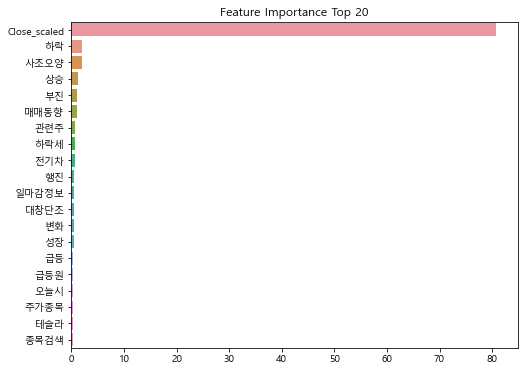

In [82]:
corp_name = '디아이씨'
window_size = 30
period_rate = 0.1

code = corp_code(corp_name)
df_p = stock_price(code)
df_p_scaled = mscaler(df_p)
df_p_scaled.rename(columns = {'Close':'Close_scaled'},inplace=True)

path = './data/데이터_뉴스키워드빈도/'
file_path = os.path.join(path,corp_name+'.csv')
df_count = pd.read_csv(file_path,index_col=0)
df_count.index = pd.DatetimeIndex(df_count.index)

df_merge = merge(df_count,df_p_scaled)

df_model = add_target(df_merge,window_size=window_size, period_rate= period_rate)

x_train = df_model.loc[:'2021-10-01',:'Close_scaled']
y_train = df_model.loc[:'2021-10-01','target']

x_test = df_model.loc['2021-10-01':,:'Close_scaled']
y_test = df_model.loc['2021-10-01':,'target']

# featurn importance
model_name = './data/machine_model_30일_10/디아이씨_CatBoostClassifier.pkl'
model = joblib.load(model_name)
pred = model.predict(x_test)

print(classification_report(y_test,pred))
feature20(model)

# 모든파일 만들기 90일 10%

In [14]:
window_size = 90
period_rate= 0.1

path = './data/데이터_뉴스키워드빈도/'
file_list = os.listdir(path)

corp_list =[]
model_list = []
accu_list = []
precision_list = []
recall_list = []
roc_list = []
model_path = []

for file in file_list[:] :
    corp_name = file[:-4]
    print('회사이름: ',corp_name)
    code = corp_code(corp_name)
    df_p = stock_price(code)
    df_p_scaled = mscaler(df_p)
    df_p_scaled.rename(columns = {'Close':'Close_scaled'},inplace=True)
    
    file_path = os.path.join(path,file)
    df_count = pd.read_csv(file_path,index_col=0)
    df_count.index = pd.DatetimeIndex(df_count.index)
    
    # 5개 미만 단어 아예없는경우는 생략
    try:
        df_count = mscaler(df_count)

        df_merge = merge(df_count,df_p_scaled)

        df_model = add_target(df_merge,window_size=window_size, period_rate= period_rate)

        x_train = df_model.loc[:'2021-10-01',:'Close_scaled']
        y_train = df_model.loc[:'2021-10-01','target']

        x_test = df_model.loc['2021-10-01':,:'Close_scaled']
        y_test = df_model.loc['2021-10-01':,'target']


        for model in models :
            time.sleep(0.3)
            model_name = model.__class__.__name__

            if model_name == 'CatBoostClassifier':
                model.fit(x_train,y_train, silent=True)
            else:
                model.fit(x_train,y_train)

            pred = model.predict(x_test)
            accuracy = accuracy_score(y_test, pred)
            proba = model.predict_proba(x_test)[:,1]
            precision = precision_score(y_test, pred)
            recall = recall_score(y_test, pred)

            try:
                roc_auc = roc_auc_score(y_test, proba)
            except:
                roc_auc = 0

            save_path = f'./data/machine_model_{window_size}일_{period_rate}/{corp_name}_{model_name}.pkl'
            joblib.dump(model, save_path)

            if (precision > 0.6) & (recall > 0.4) & (precision!=1):

                corp_list.append(corp_name)
                model_list.append(model_name)
                accu_list.append(accuracy)
                precision_list.append(precision)
                recall_list.append(recall)
                roc_list.append(roc_auc)
                model_path.append(save_path)

                print('회사이름: ',corp_name)
                print('모델이름: ',model_name)
                get_clf_eval(y_test,pred, proba)
                print(save_path)
                print('-'*50)

    except:
        print('출현 단어 5개 미만 종목')
    
    print('='* 50)
    
df_result = pd.DataFrame({'회사이름':corp_list, '모델이름':model_list,'accuracy':accu_list,
                          'precision':precision_list,'recall':recall_list,'roc_auc':roc_list,'모델주소':model_path})

df_result.to_csv(f'./data/model_result/machine_model_{window_size}일_{period_rate}.csv')


회사이름:  AJ네트웍스
[08:11:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  AK홀딩스
[08:11:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  BGF
[08:11:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  BYC
[08:11:51] WARNING: C

[08:13:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  HJ중공업
[08:13:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  HMM
[08:13:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  HSD엔진
회사이름:  HSD엔진
모델이름:  RandomForestC

회사이름:  KT&G
출현 단어 5개 미만 종목
회사이름:  KT
[08:14:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  KTcs
[08:14:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  LF
[08:14:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  LG
[

회사이름:  SBS
[08:15:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  SGC에너지
[08:15:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  SG글로벌
[08:15:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  SG세계물산
[08:15:56] WARNING

회사이름:  STX
[08:16:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  STX엔진
[08:17:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  STX중공업
[08:17:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  SUN&L
[08:17:08] WARNING:

회사이름:  고려아연
[08:17:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  고려제강
[08:17:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  광동제약
[08:18:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  광명전기
[08:18:03] WARNING: C:

회사이름:  넥센타이어
[08:19:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  노루페인트
[08:19:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  노루홀딩스
[08:19:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  녹십자
[08:19:17] WARNING: 

회사이름:  대원전선
[08:20:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  대원제약
[08:20:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  대원화성
[08:20:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  대유에이텍
[08:20:30] WARNING: C

[08:21:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  동국제강
[08:21:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  동방
[08:21:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  동방아그로
[08:21:33] WARNING: C:/Users/Admini

[08:22:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  디와이
[08:22:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  디와이파워
[08:22:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  디와이파워
모델이름:  XGBClassifier
accuracy:0.6

회사이름:  미래아이앤지
[08:23:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  미원상사
[08:23:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  바다로19호
[08:23:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  백산
[08:23:48] WARNING: 

회사이름:  삼성전기
[08:24:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  삼성전자
[08:24:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  삼성중공업
[08:25:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  삼성출판사
[08:25:04] WARNING: 

회사이름:  서연
[08:25:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  서연이화
[08:25:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  서울가스
[08:26:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  서원
[08:26:05] WARNING: C:/Use

회사이름:  송원산업
회사이름:  송원산업
모델이름:  RandomForestClassifier
accuracy:0.6562, precision:0.8421, recall:0.6667, roc_auc:0.6641
./data/machine_model_90일_0.1/송원산업_RandomForestClassifier.pkl
--------------------------------------------------
[08:27:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  송원산업
모델이름:  XGBClassifier
accuracy:0.7500, precision:0.8636, recall:0.7917, roc_auc:0.7656
./data/machine_model_90일_0.1/송원산업_XGBClassifier.pkl
--------------------------------------------------
회사이름:  송원산업
모델이름:  CatBoostClassifier
accuracy:0.7812, precision:0.8696, recall:0.8333, roc_auc:0.8411
./data/machine_model_90일_0.1/송원산업_CatBoostClassifier.pkl
--------------------------------------------------
회사이름:  수산중공업
[08:27:04] WARNING: C:/Users/Admin

회사이름:  씨아이테크
[08:28:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  씨에스윈드
[08:28:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  아모레G
[08:28:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  아모레퍼시픽
[08:28:23] WARNING

회사이름:  엘브이엠씨홀딩스
[08:29:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  엠씨넥스
[08:29:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  영보화학
[08:29:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  영원무역
[08:29:33] WARNING

회사이름:  유니퀘스트
[08:30:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  유니퀘스트
모델이름:  XGBClassifier
accuracy:0.6875, precision:0.6364, recall:0.5385, roc_auc:0.6680
./data/machine_model_90일_0.1/유니퀘스트_XGBClassifier.pkl
--------------------------------------------------
회사이름:  유성기업
[08:30:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  유수홀딩스
[08:30:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the defaul

회사이름:  일정실업
[08:31:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  일진다이아
[08:31:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  일진머티리얼즈
[08:31:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  일진전기
[08:31:44] WARNING

회사이름:  진양산업
[08:32:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  진양홀딩스
[08:32:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  진원생명과학
[08:32:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  참엔지니어링
[08:32:46] WARNIN

회사이름:  태광산업
[08:33:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  태림포장
[08:33:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  태양금속
[08:33:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  태영건설
[08:33:58] WARNING: C:

회사이름:  플레이그램
출현 단어 5개 미만 종목
회사이름:  하나투어
[08:34:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  하이스틸
[08:34:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  하이트진로
[08:34:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:

[08:35:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한미사이언스
[08:35:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한미약품
[08:36:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한섬
[08:36:04] WARNING: C:/Users/Admin

[08:37:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한진중공업홀딩스
[08:37:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한진칼
[08:37:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한화
[08:37:19] WARNING: C:/Users/Admi

[08:38:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  현대퓨처넷
[08:38:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  현대홈쇼핑
[08:38:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  혜인
[08:38:36] WARNING: C:/Users/Admin

In [15]:
df_result

,회사이름,모델이름,accuracy,precision,recall,roc_auc,모델주소
0,HSD엔진,RandomForestClassifier,0.65625,0.750000,0.631579,0.783401,./data/machine_model_90일_0.1/HSD엔진_RandomFores...
1,HSD엔진,XGBClassifier,0.68750,0.846154,0.578947,0.850202,./data/machine_model_90일_0.1/HSD엔진_XGBClassifi...
2,HSD엔진,CatBoostClassifier,0.75000,0.923077,0.631579,0.910931,./data/machine_model_90일_0.1/HSD엔진_CatBoostCla...
3,KEC,RandomForestClassifier,0.78125,0.800000,0.615385,0.823887,./data/machine_model_90일_0.1/KEC_RandomForestC...
4,KEC,XGBClassifier,0.84375,0.900000,0.692308,0.927126,./data/machine_model_90일_0.1/KEC_XGBClassifier...
5,KEC,CatBoostClassifier,0.78125,0.800000,0.615385,0.866397,./data/machine_model_90일_0.1/KEC_CatBoostClass...
6,SK하이닉스,RandomForestClassifier,0.46875,0.750000,0.480000,0.454286,./data/machine_model_90일_0.1/SK하이닉스_RandomFore...
7,SK하이닉스,XGBClassifier,0.56250,0.739130,0.680000,0.342857,./data/machine_model_90일_0.1/SK하이닉스_XGBClassif...
8,SK하이닉스,CatBoostClassifier,0.56250,0.739130,0.680000,0.325714,./data/machine_model_90일_0.1/SK하이닉스_CatBoostCl...
9,TCC스틸,RandomForestClassifier,0.65625,0.857143,0.692308,0.711538,./data/machine_model_90일_0.1/TCC스틸_RandomFores...


# 모든파일 만들기 90일 15%

In [16]:
window_size = 90
period_rate= 0.15

path = './data/데이터_뉴스키워드빈도/'
file_list = os.listdir(path)

corp_list =[]
model_list = []
accu_list = []
precision_list = []
recall_list = []
roc_list = []
model_path = []

for file in file_list[:] :
    corp_name = file[:-4]
    print('회사이름: ',corp_name)
    code = corp_code(corp_name)
    df_p = stock_price(code)
    df_p_scaled = mscaler(df_p)
    df_p_scaled.rename(columns = {'Close':'Close_scaled'},inplace=True)
    
    file_path = os.path.join(path,file)
    df_count = pd.read_csv(file_path,index_col=0)
    df_count.index = pd.DatetimeIndex(df_count.index)
    
    # 5개 미만 단어 아예없는경우는 생략
    try:
        df_count = mscaler(df_count)

        df_merge = merge(df_count,df_p_scaled)

        df_model = add_target(df_merge,window_size=window_size, period_rate= period_rate)

        x_train = df_model.loc[:'2021-10-01',:'Close_scaled']
        y_train = df_model.loc[:'2021-10-01','target']

        x_test = df_model.loc['2021-10-01':,:'Close_scaled']
        y_test = df_model.loc['2021-10-01':,'target']


        for model in models :
            time.sleep(0.3)
            model_name = model.__class__.__name__

            if model_name == 'CatBoostClassifier':
                model.fit(x_train,y_train, silent=True)
            else:
                model.fit(x_train,y_train)

            pred = model.predict(x_test)
            accuracy = accuracy_score(y_test, pred)
            proba = model.predict_proba(x_test)[:,1]
            precision = precision_score(y_test, pred)
            recall = recall_score(y_test, pred)

            try:
                roc_auc = roc_auc_score(y_test, proba)
            except:
                roc_auc = 0

            save_path = f'./data/machine_model_{window_size}일_{period_rate}/{corp_name}_{model_name}.pkl'
            joblib.dump(model, save_path)

            if (precision > 0.6) & (recall > 0.4) & (precision!=1):

                corp_list.append(corp_name)
                model_list.append(model_name)
                accu_list.append(accuracy)
                precision_list.append(precision)
                recall_list.append(recall)
                roc_list.append(roc_auc)
                model_path.append(save_path)

                print('회사이름: ',corp_name)
                print('모델이름: ',model_name)
                get_clf_eval(y_test,pred, proba)
                print(save_path)
                print('-'*50)

    except:
        print('출현 단어 5개 미만 종목')
    
    print('='* 50)
    
df_result = pd.DataFrame({'회사이름':corp_list, '모델이름':model_list,'accuracy':accu_list,
                          'precision':precision_list,'recall':recall_list,'roc_auc':roc_list,'모델주소':model_path})

df_result.to_csv(f'./data/model_result/machine_model_{window_size}일_{period_rate}.csv')


회사이름:  AJ네트웍스
[09:11:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  AK홀딩스
[09:11:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  BGF
[09:11:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  BYC
[09:12:00] WARNING: C

회사이름:  HDC현대EP
[09:13:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  HJ중공업
[09:13:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  HMM
[09:13:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  HSD엔진
[09:13:29] WARNING

회사이름:  KTcs
[09:14:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  LF
[09:14:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  LG
[09:14:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  LG디스플레이
[09:14:49] WARNING: C:/

회사이름:  SGC에너지
[09:16:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  SG글로벌
[09:16:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  SG세계물산
[09:16:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  SIMPAC
[09:16:08] WARN

[09:17:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  SUN&L
[09:17:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  TCC스틸
회사이름:  TCC스틸
모델이름:  RandomForestClassifier
accuracy:0.6562, precision:0.9167, recall:0.5238, roc_auc:0.6775
./data/machine_model_90일_0.15/TCC스틸_RandomForestClassifier.pkl
--------------------------------------------------
[09:17:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the

회사이름:  광명전기
[09:18:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  광전자
[09:18:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  국도화학
[09:18:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  국동
[09:18:25] WARNING: C:/Us

회사이름:  녹십자
[09:19:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  녹십자홀딩스
[09:19:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  농심
[09:19:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  농심홀딩스
[09:19:44] WARNING: C:

회사이름:  대원전선
[09:20:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  대원제약
[09:20:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  대원화성
[09:20:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  대유에이텍
[09:20:46] WARNING: C

[09:21:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  동국제강
[09:21:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  동방
[09:21:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  동방아그로
[09:21:51] WARNING: C:/Users/Admini

[09:22:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  디와이
[09:22:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  디와이파워
[09:22:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  디티알오토모티브
[09:23:01] WARNING: C:/Users/A

[09:24:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  백산
[09:24:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  범양건영
[09:24:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  벽산
[09:24:16] WARNING: C:/Users/Administr

[09:25:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  삼성출판사
[09:25:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  삼양사
[09:25:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  삼양식품
[09:25:35] WARNING: C:/Users/Admin

회사이름:  서울가스
[09:26:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  서원
[09:26:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  서흥
[09:26:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  선도전기
[09:26:38] WARNING: C:/Use

회사이름:  스카이라이프
[09:27:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  신대양제지
[09:27:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  신도리코
[09:27:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  신라교역
[09:27:46] WARNING:

회사이름:  아모레퍼시픽
[09:28:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  아세아
[09:29:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  아세아시멘트
[09:29:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  아세아제지
[09:29:09] WARNING

회사이름:  영원무역
[09:30:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  영원무역홀딩스
[09:30:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  영풍
[09:30:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  영흥
[09:30:22] WARNING: C:/

회사이름:  유엔젤
[09:31:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  유한양행
[09:31:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  이건산업
[09:31:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  이노션
[09:31:29] WARNING: C:/U

회사이름:  잇츠한불
[09:32:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  자화전자
회사이름:  자화전자
모델이름:  RandomForestClassifier
accuracy:0.5312, precision:0.8571, recall:0.4800, roc_auc:0.5171
./data/machine_model_90일_0.15/자화전자_RandomForestClassifier.pkl
--------------------------------------------------
[09:32:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  전방
[09:32:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.

회사이름:  컨버즈
[09:33:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  케이비아이동국실업
[09:33:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  케이씨
[09:33:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  코리아써키트
[09:33:46] WARNIN

회사이름:  텔코웨어
[09:34:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  토니모리
[09:34:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  티에이치엔
[09:34:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  티웨이홀딩스
[09:34:54] WARNING:

회사이름:  한국석유
[09:35:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한국수출포장
[09:35:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한국앤컴퍼니
[09:35:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한국전력
[09:35:59] WARNING

회사이름:  한솔로지스틱스
[09:36:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한솔제지
[09:37:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한솔케미칼
[09:37:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  한솔테크닉스
[09:37:07] WARNI

회사이름:  현대건설
[09:38:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  현대그린푸드
[09:38:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  현대글로비스
[09:38:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  현대두산인프라코어
[09:38:26] WA

회사이름:  화신
[09:39:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  화천기공
[09:39:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  황금에스티
[09:39:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
회사이름:  효성
[09:39:38] WARNING: C:/Us